# Notebook description

The NEF synapse is equivalent to a low-pass filter. 

$$\tau\dot{x} = -x + u$$

Specifically, this notebook seeks to answer
 - How much will the low-pass filter attenuate a signal?
 - How much will the low-pass filter phase shift a signal?

# Summary of results

For an input signal of frequency $f$, expect

$$\frac{1}{\sqrt{1+(2\pi f\tau)^2}}$$

attenuation and 

$$\arctan(2\pi f\tau)$$

phase shift.

# Frequency domain analysis

Given

$$\tau\dot{x} = -x + u$$

Taking the Fourier transform,

\begin{align}
\tau j\omega X(\omega) &= -X(\omega) + U(\omega) \\
(1+\tau j\omega) X(\omega) &= U(\omega) \\
X(\omega) &= \frac{1}{1+j\tau\omega} U(\omega) \\
\end{align}

In this form, we can see the effect of the low-pass filter on sin waves of different frequencies. We will see that the low-pass filter will attenuate and phase shift a sin wave.

Let input $u$ be a sin wave of frequency $f$ so that $u(t) = \sin(2\pi ft) = \sin(\omega_0t)$ where $\omega_0=2\pi f$. Therefore,

$$U(\omega) = \frac{\pi}{j}[\delta(\omega-\omega_0)-\delta(\omega+\omega_0)]$$

and

\begin{align}
X(\omega) &= \frac{1}{1+j\tau\omega}\frac{\pi}{j}[\delta(\omega-\omega_0)-\delta(\omega+\omega_0)] \\
 &= \frac{\pi}{j}\left[\frac{1}{1+j\tau\omega}\delta(\omega-\omega_0)-
     \frac{1}{1+j\tau\omega}\delta(\omega+\omega_0)\right] \\
 &= \frac{\pi}{j}\left[\frac{1}{1+j\tau\omega_0}\delta(\omega-\omega_0)-
     \frac{1}{1-j\tau\omega_0}\delta(\omega+\omega_0)\right] \\
\end{align}

which looks similar to the Fourier transform of a sinusoid. To show that $X(\omega)$ is a shifted, scaled version of the original sin, we first rationalize the $\frac{1}{1+j\tau\omega_0}$ and $\frac{1}{1-j\tau\omega_0}$ complex scalings.

\begin{align}
\frac{1}{1+j\tau\omega_0} &= \frac{1}{1+j\tau\omega_0}\frac{1-j\tau\omega_0}{1-j\tau\omega_0} \\
 &= \frac{1-j\tau\omega_0}{1+\tau^2\omega_0^2} \\
 &= \frac{1}{1+\tau^2\omega_0^2}+j\frac{-\tau\omega_0}{1+\tau^2\omega_0^2} \\
 &= \alpha e^{j\phi_+}
\end{align}

where

\begin{align}
\alpha &= \sqrt{\left(\frac{1}{1+\tau^2\omega_0^2}\right)^2+\left(\frac{-\tau\omega_0}{1+\tau^2\omega_0^2}\right)^2} \\
 &= \sqrt{\frac{1+\tau^2\omega_0^2}{\left(1+\tau^2\omega_0^2\right)^2}} \\
\alpha &= \frac{1}{\sqrt{1+\tau^2\omega_0^2}} \\
\end{align}

and

\begin{align}
\phi_+ &= \arctan\left(\frac{\frac{-\tau\omega_0}{1+\tau^2\omega_0^2}}{\frac{1}{1+\tau^2\omega_0^2}}\right) \\
 &= \arctan(-\tau\omega_0) \\
\end{align}

Similarly,
\begin{align}
\frac{1}{1-j\tau\omega_0} &= \frac{1}{1-j\tau\omega_0}\frac{1+j\tau\omega_0}{1+j\tau\omega_0} \\
 &= \frac{1+j\tau\omega_0}{1+\tau^2\omega_0^2} \\
 &= \frac{1}{1+\tau^2\omega_0^2}+j\frac{\tau\omega_0}{1+\tau^2\omega_0^2} \\
 &= \alpha e^{j\phi_-}
\end{align}

where

\begin{align}
\phi_- &= \arctan\left(\frac{\frac{\tau\omega_0}{1+\tau^2\omega_0^2}}{\frac{1}{1+\tau^2\omega_0^2}}\right) \\
 &= \arctan(\tau\omega_0) \\
\end{align}

\begin{align}
X(\omega) &= \frac{\pi}{j}\left[\frac{1}{1+j\tau\omega_0}\delta(\omega-\omega_0)-
     \frac{1}{1-j\tau\omega_0}\delta(\omega+\omega_0)\right] \\
 &= \frac{\pi}{j}\left[\alpha e^{j\phi_+}\delta(\omega-\omega_0)-
     \alpha e^{j\phi_-}\delta(\omega+\omega_0)\right] \\
 &= \frac{\pi}{j}\left[\alpha e^{j\arctan(-\tau\omega_0)}\delta(\omega-\omega_0)-
     \alpha e^{j\arctan(\tau\omega_0)}\delta(\omega+\omega_0)\right] \\
 &= \frac{\pi}{j}\left[\alpha e^{-j\arctan(\tau\omega_0)}\delta(\omega-\omega_0)-
     \alpha e^{-j\arctan(-\tau\omega_0)}\delta(\omega+\omega_0)\right] \\
 &= \frac{\pi}{j}\left[\alpha e^{-j\arctan(\tau\omega)}\delta(\omega-\omega_0)-
     \alpha e^{-j\arctan(\tau\omega)}\delta(\omega+\omega_0)\right] \\
 &= \frac{1}{\sqrt{1+\tau^2\omega_0^2}}
     e^{-j\arctan(\tau\omega)}\frac{\pi}{j}\left[\delta(\omega-\omega_0)-\delta(\omega+\omega_0)\right] \\
\end{align}

Here we can see the attenuation and phase shift produced by the low pass filter. It will attenuate the sin wave by

$$
\frac{1}{\sqrt{1+(2\pi f\tau)^2}}
$$

and phase shift the sin wave by

$$
\arctan(2\pi f\tau)
$$

Note that we really could have just analyzed the transfer function to see this.

# Simulation

Let's check the theory with a simulation.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from numpy import pi

In [3]:
def lpf(dt, u, tau):
    n = u.shape[0]
    u_filt = np.zeros(n)
    decay = np.exp(-dt/tau)
    increment = (1-decay)
    for idx in xrange(1, n):
        u_filt[idx] = decay*u_filt[idx-1] + increment*u[idx]
    return u_filt

def th_gain(tau, f):
    return 1./np.sqrt(1+(2*pi*f*tau)**2)

def th_phase(tau, f):
    return np.arctan(2*pi*f*tau)

In [ ]:
def sim_vs_theory(dt, tau, f, T=None, ax=None, lloc=None):
    if T is None:
        T = 4./f
    if ax is None:
        fig = figure(figsize=(8,6))
        ax = fig.add_subplot(111)
    N = int(np.ceil(T/dt))
    t = dt*np.arange(N)
    u = np.sin(2*pi*f*t)
    up = th_gain(tau, f)*np.sin(2*pi*f*t-th_phase(tau, f))

    uf = lpf(dt, u, tau)
    ax.plot(t, u, 'k', label=r'$u(t)$')
    ax.plot(t, uf, 'b', lw=2, label=r'filtered $u(t)$')
    ax.plot(t, up, 'r:', lw=4, label=r'predicted $u(t)$')
    if lloc is not None:
        ax.legend(loc=lloc)
    ax.set_xlim(0, T)
    ax.set_title(r'$f=%.0f$' % f, fontsize=20)

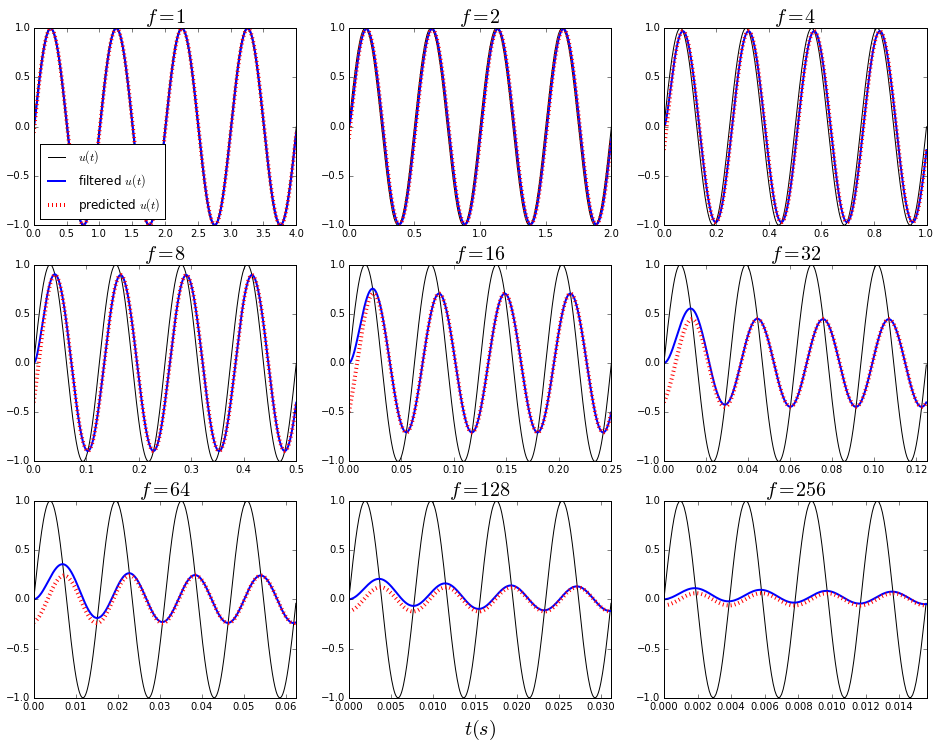

In [31]:
fig = figure(figsize(16, 12))
axs = [fig.add_subplot(3,3,i+1) for i in xrange(9)]
f = [2**i for i in xrange(9)]
for idx, f_val in enumerate(f):
    if idx == 0:
        sim_vs_theory(dt=.0001, tau=.01, f=f_val, ax=axs[idx], lloc='lower left')
    else:
        sim_vs_theory(dt=.0001, tau=.01, f=f_val, ax=axs[idx])
axs[7].set_xlabel(r'$t(s)$', fontsize=20);

## Error due to attenuation

Some error in an NEF network will result simply from the attenuating effects of the synaptic low-pass filters. To meet our specification of 1% error, we need to understand how attenuation affects the error.

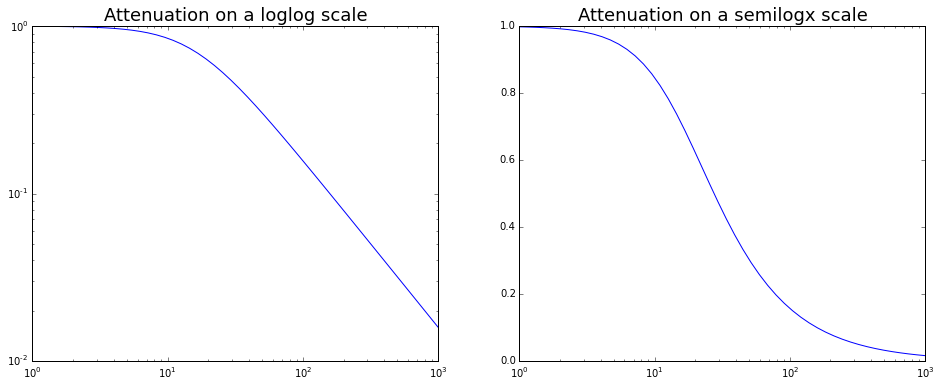

In [38]:
tau = .01
f = np.logspace(0, 3, 50)
gain = th_gain(tau, f)
fig = figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax.loglog(f, gain)
ax.set_title('Attenuation on a loglog scale', fontsize=18)
ax = fig.add_subplot(122)
ax.semilogx(f, gain)
ax.set_title('Attenuation on a semilogx scale', fontsize=18);

Where will we introduce a 1% relative error just from low pass filtering a signal even if we shift to compensate for the phase lag?

Relative error is defined as 

$$
e=\frac{\|x-\hat{x}\|_2}{\|x\|_2}
$$

where $x$ is our reference signal and $\hat{x}$ is our low-pass filtered signal. We desire $e<0.01$. Let's say $\hat{x}$ is simply a scaled, unshifted version of $x$ so $\hat{x}=\alpha x$ where $0<\alpha<1$.

\begin{align}
\frac{\|x-\hat{x}\|_2}{\|x\|_2} &= \frac{\|x-\alpha x\|_2}{\|x\|_2} \\
 &= \frac{\|(1-\alpha)x\|_2}{\|x\|_2} \\
 &= (1-\alpha)\frac{\|x\|_2}{\|x\|_2} \\
 &= 1-\alpha
\end{align}

Therefore,

\begin{align}
1-\alpha &< 0.01 \\
\alpha &\ge 0.99 \\
\end{align}

so when is the scaling factor due to filtering $\ge0.99$?

\begin{align}
\frac{1}{\sqrt{1+(2\pi f\tau)^2}} &\ge 0.99 \\
\sqrt{1+(2\pi f\tau)^2} &\le \frac{1}{0.99} \\
1+(2\pi f\tau)^2 &\le \frac{1}{0.99^2} \\
(2\pi f\tau)^2 &\le \frac{1}{0.99^2}-1\\
f\tau &\le \frac{\sqrt{\frac{1}{0.99^2}-1}}{2\pi} \\
\end{align}

In [39]:
def spec(f=None, tau=None, pct_err=.01):
    assert (f is not None) or (tau is not None), 'must specify f or tau'
    k = np.sqrt(1./(1-pct_err)**2-1)/(2*np.pi)
    if (f is not None) and (tau is None):
        return k/f
    elif (f is None) and (tau is not None):
        return k/tau
    else:
        return f*tau <= k

In [56]:
tau = .01
max_f = spec(tau=tau)
print('max frequency within 1 percent spec for tau=%.2f is %.2f' % (tau, max_f)) 

max frequency within 1 percent spec for tau=0.01 is 2.27
